We first load all modules we will use for this notebook

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import math

Create a function to calculate the cosine similarity between two given vectors

In [25]:
def cosine_similarity(a,b):
    cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
    return cos_sim

Below are a few things to remember about a cosine similarity

A cosine similarity measures the cosine of the angle between the two given vectors. Essentially, it measures the projection of one along the other. <br>
A cosine similarity of 0 means that the projection of one on the other is zero, meaning they are orthogonal.
<br>
A cosine similarity of 1 means that they are parallel and a cosine similarity of -1 means that they are anti-parallel.

Below we define a few vectors for testing purposes.

In [26]:
x1=np.array([1,0])
x2=np.array([2, 0])
x3=np.array([0, 4])
x4=np.random.randint(low=-10,high=10,size=2) # Randomly created integer vector
print(x1,x2,x3,x4)

[1 0] [2 0] [0 4] [-3 -3]


We now calculate the cosine similarity between x1 and the other three vectors

In [27]:
cos_sim_x1x2=cosine_similarity(x1,x2)
cos_sim_x1x3=cosine_similarity(x1,x3)
cos_sim_x1x4=cosine_similarity(x1,x4)

print("The cosine similarity of ", x1, "and", x2 ,"is %.3f" %(cos_sim_x1x2))
print("The cosine similarity of ", x1, "and", x3 ,"is %.3f" %(cos_sim_x1x3))
print("The cosine similarity of ", x1, "and", x4 ,"is %.3f" %(cos_sim_x1x4))

The cosine similarity of  [1 0] and [2 0] is 1.000
The cosine similarity of  [1 0] and [0 4] is 0.000
The cosine similarity of  [1 0] and [-3 -3] is -0.707


Below we visualize all 4 vectors.

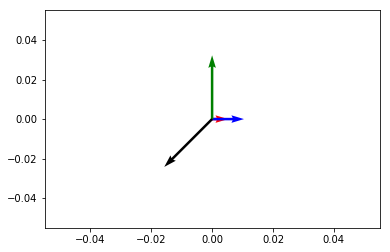

In [28]:
V = np.array([x1,x2,x3,x4])
origin = [0], [0] # origin point
plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g','k'], scale=21)
plt.show()

We calculate the distance of vector x4 using four different distance metrics.

In [29]:
l1_x4=np.linalg.norm(x4,1)
l2_x4=np.linalg.norm(x4,2)
l4_x4=np.linalg.norm(x4,4)
l10_x4=np.linalg.norm(x4,10)

print("The l1 distance of ", x4, "is %.3f" %l1_x4)
print("The l2 distance of ", x4, "is %.3f" %l2_x4)
print("The l4 distance of ", x4, "is %.3f" %l4_x4)
print("The l10 distance of ", x4, "is %.3f" %l10_x4)

The l1 distance of  [-3 -3] is 6.000
The l2 distance of  [-3 -3] is 4.243
The l4 distance of  [-3 -3] is 3.568
The l10 distance of  [-3 -3] is 3.215


We calculate the distance between vector x4 and vector x1 using the same 4 different distance metrics.

In [30]:
xSub = x4 - x1

l1_xSub=np.linalg.norm(xSub,1)
l2_xSub=np.linalg.norm(xSub,2)
l4_xSub=np.linalg.norm(xSub,4)
l10_xSub=np.linalg.norm(xSub,10)

print("The l1 distance of ", x4, "minus", x1, "is %.3f" %l1_xSub)
print("The l2 distance of ", x4, "minus", x1, "is %.3f" %l2_xSub)
print("The l4 distance of ", x4, "minus", x1, "is %.3f" %l4_xSub)
print("The l10 distance of ", x4, "minus", x1, "is %.3f" %l10_xSub)

The l1 distance of  [-3 -3] minus [1 0] is 7.000
The l2 distance of  [-3 -3] minus [1 0] is 5.000
The l4 distance of  [-3 -3] minus [1 0] is 4.285
The l10 distance of  [-3 -3] minus [1 0] is 4.022


Create a random matrix and calculate its rank.

In [31]:
np.random.seed(seed=402)
Mat=np.random.uniform(-10,10,(3,3))

print(Mat)
print("The rank of matrix Mat is %i" %np.linalg.matrix_rank(Mat))

[[-8.98284725 -0.46598279 -3.76715685]
 [ 8.03269592 -0.09947017 -0.03530441]
 [ 8.23689424  9.13449309 -3.09868078]]
The rank of matrix Mat is 3


Note that in order for there to be an inverse the rank must be the same as the number of rows/columns, as rank can only be calculated for a square matrix.<br>
If the rank is less than the number of rows/columns than the basis does not span the entire n-dimensional space.

We now calculate the exact inverse of this matrix.

In [32]:
Mat_inv = np.linalg.inv(Mat)

print("The inverse of Matrix Mat is below")
print(Mat_inv)

The inverse of Matrix Mat is below
[[-0.00212627  0.12087492  0.0012078 ]
 [-0.08293177 -0.1984454   0.10308353]
 [-0.25012371 -0.2636813  -0.01563106]]


For testing whether this inverse is correct I will calculate this inverse matrix multiplied by the specified vector b.

In [33]:
b=np.array([1,2,3]).reshape(3,1)

# Using the formula x = Mat_inv * b
x = np.matmul(Mat_inv,b)

print(x)

[[ 0.24324697]
 [-0.17057196]
 [-0.82437947]]


Then multiply my original matrix times this output matrix. If the inverse was calculated perfectly this should give me back the original vector b.

In [34]:
# To test I will multiply Mat * x and make sure it is b
print(np.matmul(Mat,x))

[[1.]
 [2.]
 [3.]]


As we had hoped, this is the same vector I started with.<br>
Thus, the inverse was calculated perfectly.

We will now solve for the vector x using a different approach, with a built-in solver.

In [35]:
x = np.linalg.solve(Mat,b)

print(x)

[[ 0.24324697]
 [-0.17057196]
 [-0.82437947]]


This is indeed the same matrix we got before. This is another indication our approach was correct.

We now create a new matrix, as defined below.

In [36]:
newMat = np.matrix([[1,-1,1],[-3,2,4],[-1,0,6]])

print(newMat)

[[ 1 -1  1]
 [-3  2  4]
 [-1  0  6]]


For this new inverse we calculate its rank, its inverse using the built-in solver, and the direct product of the matrix and the calculated inverse.

In [37]:
# Find rank
rank_new = np.linalg.matrix_rank(newMat)
print("The rank of newMat is", rank_new)

# Calculate Inverse
newMat_inv = np.linalg.inv(newMat)
print("The inverse of newMat is below")
print(newMat_inv)

# Multiply matrix with its calculated inverse
print("Below is the product of newMat and newMat_inv")
print(np.matmul(newMat,newMat_inv))

The rank of newMat is 2
The inverse of newMat is below
[[-6.75539944e+15 -3.37769972e+15  3.37769972e+15]
 [-7.88129935e+15 -3.94064967e+15  3.94064967e+15]
 [-1.12589991e+15 -5.62949953e+14  5.62949953e+14]]
Below is the product of newMat and newMat_inv
[[ 1.    -0.5    0.625]
 [-2.     1.    -0.5  ]
 [ 0.     0.     1.   ]]


Obviously the multiplication of a matrix and its inverse should be one. <br>
However, as we have a 3D matrix, and the rank is 2, we also know that the inverse should not exist.<br>
I will use this questionable inverse in the calculation for the following part.

Using this above-calculated 'inverse' we once again calculate x from our same manually defined vector b.

In [38]:
# Let us again define our vector b
b=np.array([1,2,3]).reshape(3,1)

# Using the formula x = newMat_inv * b
x = np.matmul(newMat_inv,b)

print(x)

[[-3.37769972e+15]
 [-3.94064967e+15]
 [-5.62949953e+14]]


As before, we see if by multiplying the matrix by this calculated vector x we recover this original vector b.<br>
As expected, this does not give back the original vector.

In [39]:
# To test I will multiply Mat * x to see if it is b
print(np.matmul(newMat,x))

[[ 2.5]
 [-2. ]
 [ 3. ]]


The above-noted limitations, where we were not able to effectively calculate the inverse of the matrix, it shows that calculations cannot always be trusted, even if there are no errors.<br>
An error would have been better, as without it we had no obvious reason to believe that the calculated inverse was not a true inverse.<br>
The following steps show that sometimes estimations can actually be much more accurate than an attempt to solve exactly.<br>
For developing a machine-learning algorithm we must be very careful to check whether the results of calculations are reasonable or not. Otherwise other approaches will be needed.

As we know that we with this matrix we cannot calculate an inverse exactly, we instead employ an estimation technique.<br>
This is shown in the below box.

In [40]:
x_new = np.linalg.lstsq(newMat,b)

print(x_new)

(array([[ 0.03100775],
       [-0.10271318],
       [ 0.53294574]]), array([], dtype=float64), 2, array([ 7.77600954,  2.92124557, -0.        ]))


/Users/bryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


With this above calculated pseudo-inverse we now see if we get back the original b matrix we entered in.<br>
If this inverse was exact the vector we get out will exactly be the vector we entered in.

In [41]:
b_hat = np.matmul(newMat,x_new[0])

print(b_hat)

[[0.66666667]
 [1.83333333]
 [3.16666667]]


We had expected to get the vector [1,2,3], and this is certainly much closer to this than what we got with the entirely false inverse.<br>
However, as this was not an exact inverse we were not able to recover the original vector exactly.

We will now calculate the Euclidean distance (meaning L2) between the provided vector and the vector we got back from the pseudo-inverse.

In [42]:
b_sub = b - b_hat

l2_bSub=np.linalg.norm(b_sub,2)

print("The Euclidean distance between b and b_hat is:",l2_bSub)

The Euclidean distance between b and b_hat is: 0.4082482904638629


We now create a random matrix with a set variance, mean, and standard deviation.

In [43]:
variance = 10
mean = 5
std_dev = math.sqrt(10)
np.random.seed(seed=88)

# Create matrix with above-defined parameters
Mat2=std_dev * np.random.randn(3,3) + mean
print(Mat2)

[[ 5.33799785 11.97540026  8.02491684]
 [ 5.21633489  8.37893737  8.15336839]
 [ 2.05418684  7.30982403  4.45857477]]


Let us calculate the determinant of this matrix.

In [44]:
# Calculate determinant
det_mat2 = np.linalg.det(Mat2)

print("The determinant of matrix Mat2 is:",det_mat2)

The determinant of matrix Mat2 is: -28.801935084011443


Note the following information about determinants.<br>
The determinant can be thought of as the scaling factor for the linear transformation described by the matrix.<br>
A negative determinant means that if we input act a vector on this matrix it will invert the orientation of the vector.<br>
A determinant of zero means that the system has either no nontrivial solutions or an infinite number of solutions.

We now calculate the eigenvalues and eigenvectors (shown horizontally for convenience) for this randomly generated matrix.

In [45]:
# Calculate eigenvalues and eigenvectors
eigenvalues,eigenvectors = np.linalg.eig(Mat2)

print("The eigenvalues for Mat2 are:",eigenvalues)
print("The eigenvectors for Mat2 are below:")
print(eigenvectors[:,0])
print(eigenvectors[:,1])
print(eigenvectors[:,2])

The eigenvalues for Mat2 are: [19.75530817  0.65297116 -2.23276935]
The eigenvectors for Mat2 are below:
[-0.70696977 -0.59649451 -0.37998426]
[-0.8022028  -0.08242487  0.59133477]
[ 0.42320826 -0.67359825  0.60593743]


Note the following properties about eigenvalues and eigenvectors.<br>
Eigenvectors are special vectors in the Rn space which can be transformed such that they are scaled larger or smaller. These correspond to the discovered eigenvalues for our system.<br>
Eigenvalues are the scale factors which are allowed for that space. They are the most important modes for our system.<br>
An eigenvalue of zero means that that there is not a corresponding eigenvector. This means that this matrix transformation takes us to a space with less dimensionality.